# ABS Census - Ad Hoc

## Python set up

In [1]:
# imports
from io import BytesIO
import pandas as pd
import matplotlib.pyplot as plt
from mgplot import line_plot_finalise, set_chart_dir, clear_chart_dir

# save charts in this notebook
plt.style.use("fivethirtyeight")
CHART_DIR = "./CHARTS/Census/"
set_chart_dir(CHART_DIR)
clear_chart_dir()


# display
SHOW = True
FILE_TYPE = "png"

## Home ownershiop by age

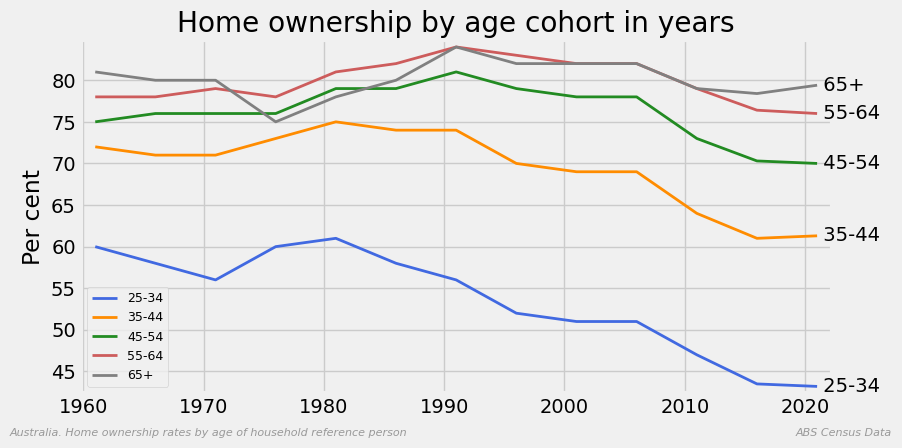

In [2]:
csv = """Age,25-34,35-44,45-54,55-64,65+
1961,60,72,75,78,81
1966,58,71,76,78,80
1971,56,71,76,79,80
1976,60,73,76,78,75
1981,61,75,79,81,78
1986,58,74,79,82,80
1991,56,74,81,84,84
1996,52,70,79,83,82
2001,51,69,78,82,82
2006,51,69,78,82,82
2011,47,64,73,79,79
2016,43.5,61,70.3,76.4,78.4
2021,43.2,61.3,70,76,79.4        
"""
data = pd.read_csv(BytesIO(csv.encode("utf-8")), index_col=0, header=0)
data.index = pd.PeriodIndex(data.index, freq="Y")
_, ax = plt.subplots()
for col in data.columns:
    ax.text(x=data.index[-1], y=data[col].iloc[-1], s=f" {col}", va="center")  # type: ignore[arg-type]
line_plot_finalise(
    data,
    ax=ax,
    title="Home ownership by age cohort in years",
    ylabel="Per cent",
    rfooter="ABS Census Data",
    lfooter="Australia. Home ownership rates by age of household reference person",
    legend={"loc": "lower left", "fontsize": 9},
    show=SHOW,
    file_type=FILE_TYPE,
)

## Tenure type

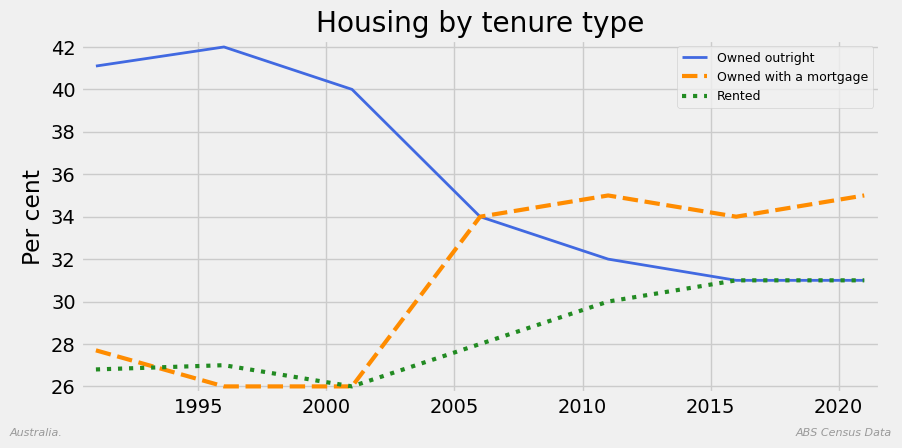

In [3]:
csv = """Owned outright,Owned with a mortgage,Rented
1991,41.1,27.7,26.8
1996,42,26,27
2001,40,26,26
2006,34,34,28
2011,32,35,30
2016,31,34,31
2021,31,35,31
"""
data = pd.read_csv(BytesIO(csv.encode("utf-8")), index_col=0, header=0)
data.index = pd.PeriodIndex(data.index, freq="Y")
line_plot_finalise(
    data,
    title="Housing by tenure type",
    ylabel="Per cent",
    rfooter="ABS Census Data",
    lfooter="Australia. ",
    legend={"loc": "upper right", "fontsize": 9},
    style=["-", "--", ":"],
    width=[2, 3, 3],
    show=SHOW,
    file_type=FILE_TYPE,
)

## Dwelling structure

In [4]:
csv = """,House,Townhouse,Apartment
1991,
2021,
"""